In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.shape

(10000, 14)

In [6]:
X.shape

(10000, 10)

In [7]:
y.shape

(10000,)

In [10]:
geography = pd.get_dummies(X['Geography'],drop_first=True)

gender = pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
geography.values

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]], dtype=uint8)

In [12]:
gender.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [14]:
X = pd.concat([X,geography,gender],axis=1)

X = X.drop(['Geography','Gender'],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [34]:
model = Sequential()


model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 14))

model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

model.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))



In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6617 - accuracy: 0.6619 - val_loss: 0.4875 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4660 - accuracy: 0.7955 - val_loss: 0.4607 - val_accuracy: 0.7993
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4431 - accuracy: 0.8031 - val_loss: 0.4472 - val_accuracy: 0.8016
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8110 - val_loss: 0.4420 - val_accuracy: 0.8054
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8175 - val_loss: 0.4374 - val_accuracy: 0.8076
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8248 - val_loss: 0.4294 - val_accuracy: 0.8160
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8309 - val_loss: 0.4159 - val_accuracy: 0.8228

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3312 - accuracy: 0.8638 - val_loss: 0.3640 - val_accuracy: 0.8501
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8608 - val_loss: 0.3617 - val_accuracy: 0.8554
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3309 - accuracy: 0.8627 - val_loss: 0.3632 - val_accuracy: 0.8516
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8614 - val_loss: 0.3640 - val_accuracy: 0.8497
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8621 - val_loss: 0.3655 - val_accuracy: 0.8485
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3306 - accuracy: 0.8623 - val_loss: 0.3651 - val_accuracy: 0.8501
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3309 - accuracy: 0.8627 - val_loss: 0.3655 - val_accuracy:

In [37]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


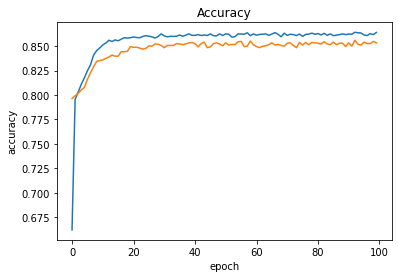

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

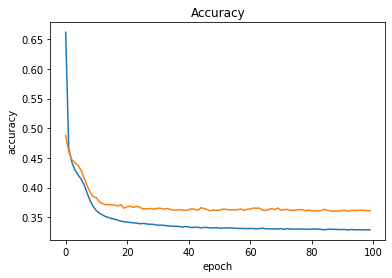

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [44]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_pred,y_test)

acc = accuracy_score(y_pred,y_test)

print(cm)

print(acc)

[[1537  219]
 [  58  186]]
0.8615
